In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Explanation of data features:
0. **passengerId**
1. **survival** : survival (0, 1)
2. **class** : passenger class (1, 2, 3)
3. **name** : name
4. **sex** : sex
5. **age** : age
6. **sibsp** : number of sibling/spouses on board
7. **parch** : number of parent/children on board
8. **ticket** : ticket number
9. **fare** : passenger fare
10. **cabin** : cabin

In [3]:
# Load the data
data_test = pd.read_csv(r"titanic_test.csv")
data_train = pd.read_csv(r"titanic_train.csv")

In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
print("contact loc.bs21don038@spjain.org")

contact loc.bs21don038@spjain.org


In [11]:
data_total= pd.concat([data_train, data_test], ignore_index=True, axis=0)
data_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [12]:
data_total.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
data_total

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [14]:
data_total[data_total["Cabin"].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,1296,NaN,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C
1296,1297,NaN,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C
1302,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [15]:
# Todo
# 1. Check for missing data of age and cabin
# 2. Fillna with average for age
# 3. Drop cabin
# 4. Dropna for embarked
# 5. Get title, get cabin letter, analyze ticket
# 6. Get dummies for sex and embark
# 7. Build log reg, classification tree, random forest, svm, knn
# 8. Confusion matrix, accuracy, precision, recall, f1 score, cross validation


In [16]:
# Approach 1: Drop all NaN values for Survived, Fillna for Age, Drop Cabin, Dropna for Embarked
data_total1_df1 = data_total.copy()
data_total1_df1 = data_total1_df1.dropna(subset = "Survived", axis=0)
data_total1_df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


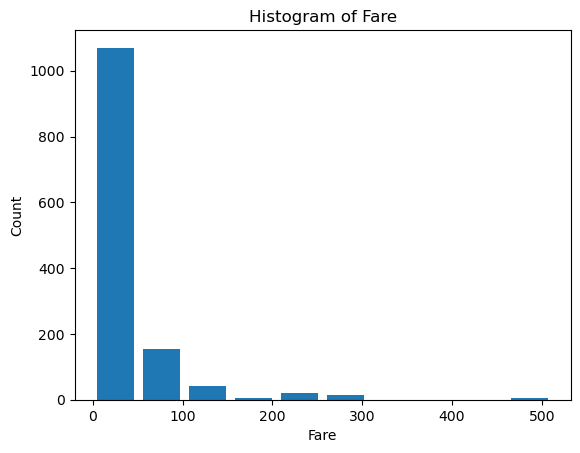

In [17]:
data_total['Fare'].plot(kind='hist', rwidth=0.8)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Histogram of Fare')
plt.show()


In [18]:
data_total1_df1["Fare"].describe()
IQR = data_total1_df1["Fare"].quantile(0.75) - data_total1_df1["Fare"].quantile(0.25)
print(data_total1_df1["Fare"].quantile(0.25) - 3*IQR, data_total1_df1["Fare"].quantile(0.75) + 3*IQR)

-61.358399999999996 100.2688


<Axes: ylabel='Frequency'>

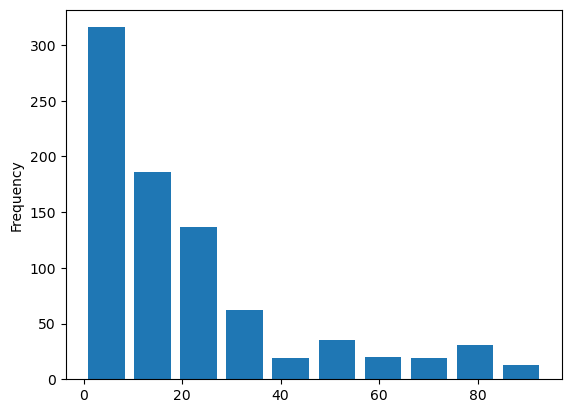

In [19]:
# Dropping the outliers
data_total1_df1 = data_total1_df1[data_total1_df1["Fare"] < 100]
data_total1_df1["Fare"].plot(kind='hist', rwidth=0.8)

<Axes: ylabel='Frequency'>

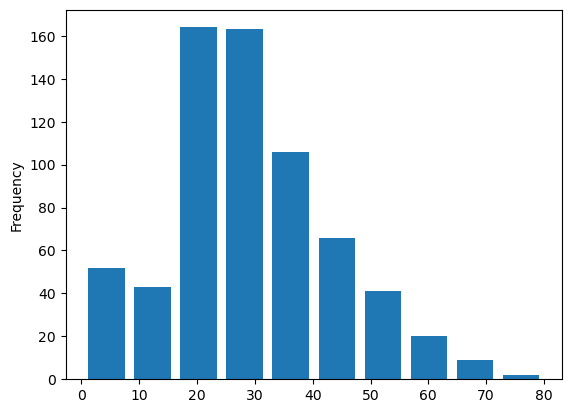

In [20]:
data_total1_df1["Age"].plot(kind='hist', rwidth=0.8)

In [21]:
data_total1_df2 = data_total1_df1.copy()
data_total1_df2["Age"] = data_total1_df1["Age"].fillna(data_total1_df1["Age"].mean())
data_total1_df2 = data_total1_df2.drop("Cabin", axis=1)
data_total1_df2 = data_total1_df2.dropna(subset = ["Embarked"], axis=0)
data_total1_df2.info()
data_total1_df2

<class 'pandas.core.frame.DataFrame'>
Index: 836 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  836 non-null    int64  
 1   Survived     836 non-null    float64
 2   Pclass       836 non-null    int64  
 3   Name         836 non-null    object 
 4   Sex          836 non-null    object 
 5   Age          836 non-null    float64
 6   SibSp        836 non-null    int64  
 7   Parch        836 non-null    int64  
 8   Ticket       836 non-null    object 
 9   Fare         836 non-null    float64
 10  Embarked     836 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 78.4+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.536411,1,2,W./C. 6607,23.4500,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [22]:
# Group by 'Embarked' and 'Sex', then calculate the count and survival rate for each group
grouped_data = data_total1_df2.groupby(['Embarked', 'Sex']).agg({'Survived': ['count', 'mean']})
grouped_data.columns = ['Count', 'Survival Rate'] 
grouped_data

Count  Survival Rate
Embarked Sex                         
C        female     55       0.836364
         male       84       0.309524
Q        female     36       0.750000
         male       41       0.073171
S        female    187       0.673797
         male      433       0.168591

In [23]:
data_total1_df3 = data_total1_df2.copy()
data_total1_df3.sort_values(by="Ticket")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.000000,0,0,110152,86.500,S
257,258,1.0,1,"Cherry, Miss. Gladys",female,30.000000,0,0,110152,86.500,S
504,505,1.0,1,"Maioni, Miss. Roberta",female,16.000000,0,0,110152,86.500,S
558,559,1.0,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.000000,1,1,110413,79.650,S
262,263,0.0,1,"Taussig, Mr. Emil",male,52.000000,1,1,110413,79.650,S
...,...,...,...,...,...,...,...,...,...,...,...
235,236,0.0,3,"Harknett, Miss. Alice Phoebe",female,29.536411,0,0,W./C. 6609,7.550,S
92,93,0.0,1,"Chaffee, Mr. Herbert Fuller",male,46.000000,1,0,W.E.P. 5734,61.175,S
219,220,0.0,2,"Harris, Mr. Walter",male,30.000000,0,0,W/C 14208,10.500,S
745,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.000000,1,1,WE/P 5735,71.000,S


In [24]:
separated = data_total1_df3[data_total1_df3["Ticket"].str.split(" ", expand=True)[0].str.isnumeric() == False]["Ticket"].str.split(" ", expand = True)
whole_numbers =  data_total1_df3[data_total1_df3["Ticket"].str.split(" ", expand=True)[0].str.isnumeric() == True]["Ticket"].str.split(" ", expand = True)
whole_numbers["Filler1"] = np.nan
whole_numbers["Filler2"] = np.nan
whole_numbers["Filler3"] = np.nan
whole_numbers = whole_numbers.reindex(columns = ["Filler1", "Filler2", "Filler3", 0])
whole_numbers.rename(columns={"Filler1": 0, "Filler2" : 1, "Filler3" : 2, 0 : "Number"}, inplace=True)
whole_numbers

,0,1,2,Number
3,NaN,NaN,NaN,113803
4,NaN,NaN,NaN,373450
5,NaN,NaN,NaN,330877
6,NaN,NaN,NaN,17463
7,NaN,NaN,NaN,349909
...,...,...,...,...
885,NaN,NaN,NaN,382652
886,NaN,NaN,NaN,211536
887,NaN,NaN,NaN,112053
889,NaN,NaN,NaN,111369


In [25]:
def check_and_assign(row):
    if pd.to_numeric(row[1], errors='coerce') != None:
        return row[1]
    else:
        return row[2]

In [26]:
separated["Number"] = separated.apply(check_and_assign, axis=1)
separated["Number"] = pd.to_numeric(separated["Number"], errors='coerce')   
separated.loc[separated["Number"].isnull()]

,0,1,2,Number
179,LINE,None,None,NaN
271,LINE,None,None,NaN
302,LINE,None,None,NaN
473,SC/AH,Basle,541,NaN
597,LINE,None,None,NaN


In [27]:
separated["Number"].fillna(17477, inplace=True)
separated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 888
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       204 non-null    object 
 1   1       200 non-null    object 
 2   2       13 non-null     object 
 3   Number  204 non-null    float64
dtypes: float64(1), object(3)
memory usage: 8.0+ KB


In [28]:
separated_with_whole = pd.concat([separated, whole_numbers], axis=0).sort_index()
only_numbers = separated_with_whole["Number"]
data_total1_df4 = pd.concat([data_total1_df3, only_numbers.astype(int)], axis=1)
data_total1_df4 = data_total1_df4.drop("Ticket", axis=1)

In [29]:
# Feature engineering for name
data_total1_df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Number
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,21171
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,17599
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,3101282
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,113803
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,373450
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,211536
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,112053
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.536411,1,2,23.4500,S,6607
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,111369


In [30]:
data_total1_df4["Title"] = data_total1_df4["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

<Axes: xlabel='Title'>

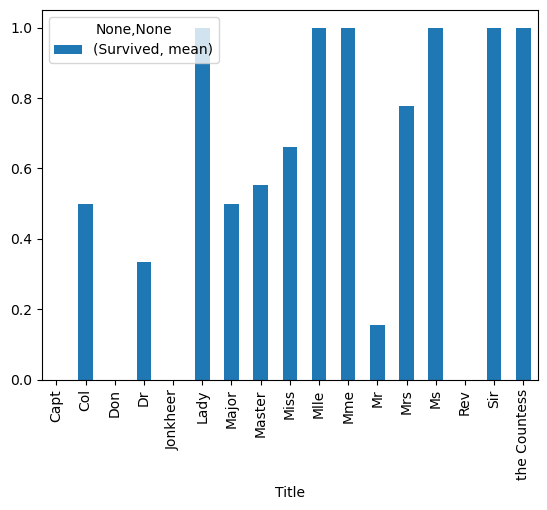

In [31]:
data_total1_df4.groupby("Title").agg({"Survived" : ["mean"]}).plot(kind='bar')
# Rev: Archbishop, a title for a bishop in the Anglican Church

<Axes: xlabel='Title'>

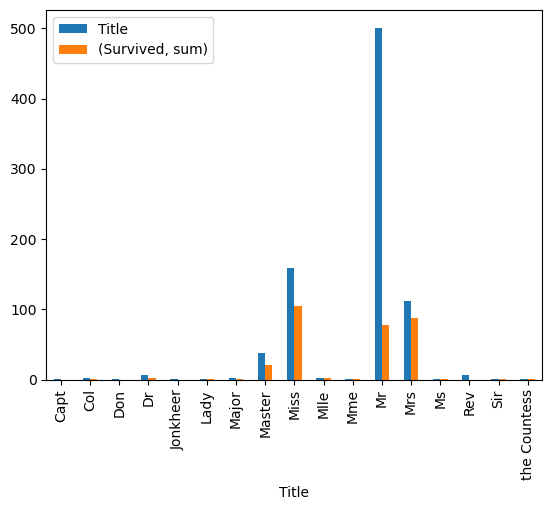

In [63]:
total_title = data_total1_df4.groupby("Title")["Title"].agg("count")
title_survived = data_total1_df4.groupby("Title").agg({"Survived" : ["sum"]}).astype(int)

survived_and_total = pd.concat([total_title, title_survived], axis=1)
survived_and_total.plot(kind='bar')

In [64]:
pd.concat([total_title, title_survived], axis=1)

,Title,"(Survived, sum)"
Title,,
Capt,1,0
Col,2,1
Don,1,0
Dr,6,2
Jonkheer,1,0
Lady,1,1
Major,2,1
Master,38,21
Miss,159,105


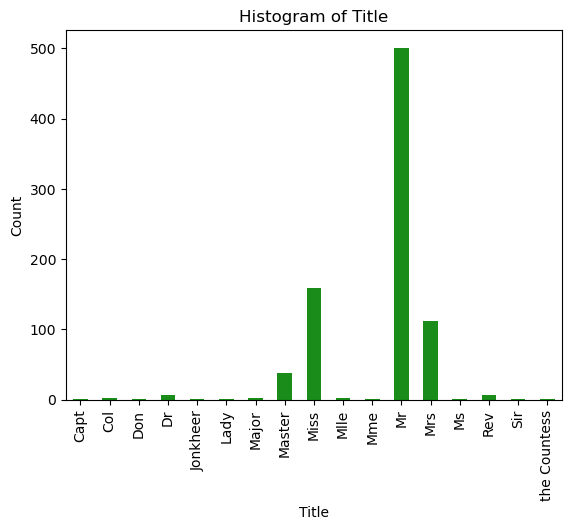

In [38]:
data_total1_df4.groupby("Title")["Title"].agg("count").plot(kind='bar', alpha=0.9, rot = 90, color = "green")
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Histogram of Title')
plt.show()

In [33]:
data_total1_df4[data_total1_df4["Title"] == "Rev"] # Lowest rank of nobility in the Netherlands

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Number,Title
149,150,0.0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,13.000,S,244310,Rev
150,151,0.0,2,"Bateman, Rev. Robert James",male,51.0,0,0,12.525,S,1166,Rev
249,250,0.0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,26.000,S,244252,Rev
626,627,0.0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,12.350,Q,219533,Rev
848,849,0.0,2,"Harper, Rev. John",male,28.0,0,1,33.000,S,248727,Rev
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.000,S,211536,Rev


In [34]:
data_total1_df4["Survived"] = data_total1_df4["Survived"].astype(bool)

In [35]:
data_total1_df4

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Number,Title
0,1,False,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,21171,Mr
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,17599,Mrs
2,3,True,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,3101282,Miss
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,113803,Mrs
4,5,False,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,211536,Rev
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,112053,Miss
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.536411,1,2,23.4500,S,6607,Miss
889,890,True,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,111369,Mr


In [75]:
data_total1_df4["Sex"].replace("male", 1, inplace=True)
data_total1_df4["Sex"].replace("female", 0, inplace=True)
data_total1_df4.drop("Name", axis=1, inplace=True)

KeyError: "['Name'] not found in axis"

In [77]:
data_total1_df4

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number,Title
0,1,0.0,3,1,22.000000,1,0,7.2500,S,21171,Mr
1,2,1.0,1,0,38.000000,1,0,71.2833,C,17599,Mrs
2,3,1.0,3,0,26.000000,0,0,7.9250,S,3101282,Miss
3,4,1.0,1,0,35.000000,1,0,53.1000,S,113803,Mrs
4,5,0.0,3,1,35.000000,0,0,8.0500,S,373450,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,1,27.000000,0,0,13.0000,S,211536,Rev
887,888,1.0,1,0,19.000000,0,0,30.0000,S,112053,Miss
888,889,0.0,3,0,29.536411,1,2,23.4500,S,6607,Miss
889,890,1.0,1,1,26.000000,0,0,30.0000,C,111369,Mr


In [ ]:
print(data_total1_df4["Fare"].describe())


count    836.000000
mean      22.274172
std       20.660337
min        0.000000
25%        7.895800
50%       13.000000
75%       27.720800
max       93.500000
Name: Fare, dtype: float64


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Number'}>, <Axes: >]], dtype=object)

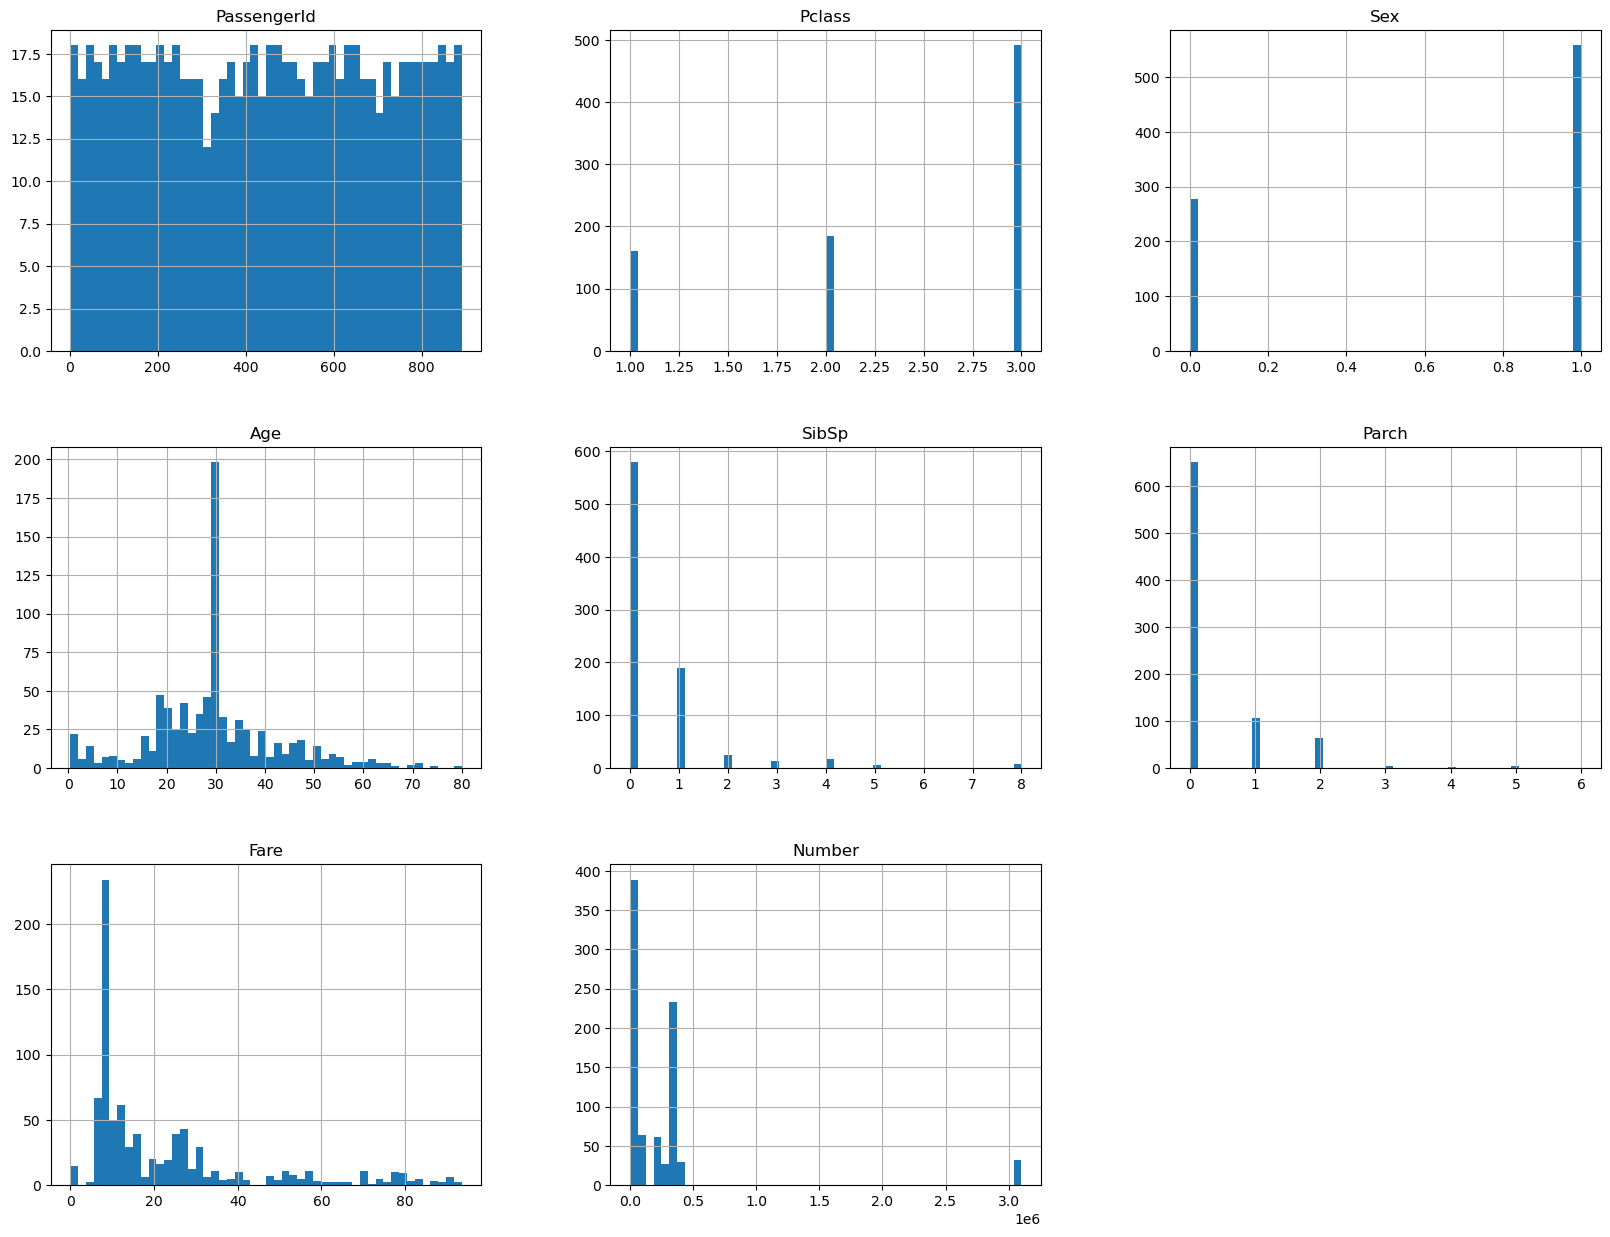

In [ ]:
data_total1_df4.hist(bins=50, figsize=(20,15))

In [ ]:
data_total1_df4["Fare"].describe()

count    836.000000
mean      22.274172
std       20.660337
min        0.000000
25%        7.895800
50%       13.000000
75%       27.720800
max       93.500000
Name: Fare, dtype: float64

In [ ]:
def get_fence(Q1, Q3):
    IQR = Q3 - Q1
    return Q1 - 1.5*IQR, Q3 + 1.5*IQR

In [ ]:
for i in ["Fare", "Age", "SibSp", "Parch", "Number"]:
    print(f'Upper and Lower fence for {i} is', get_fence(data_total1_df4[i].quantile(0.25), data_total1_df4[i].quantile(0.75)))


Upper and Lower fence for Fare is (-21.841699999999996, 57.458299999999994)
Upper and Lower fence for Age is (3.0625, 53.5625)
Upper and Lower fence for SibSp is (-1.5, 2.5)
Upper and Lower fence for Parch is (0.0, 0.0)
Upper and Lower fence for Number is (-488011.125, 848137.875)


<Axes: ylabel='Frequency'>

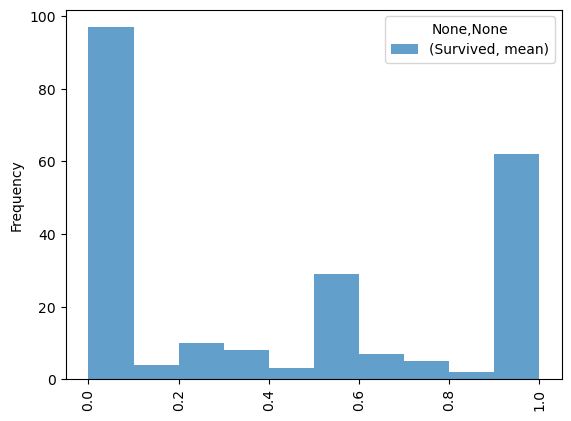

In [ ]:
data_total1_df4.groupby("Fare").agg({"Survived" : ["mean"]}).plot(kind='hist', alpha=0.7, rot = 90)

In [127]:
# Filter for outliers
data_total1_df5 = data_total1_df4.copy()
data_total1_df5 = data_total1_df5[data_total1_df5["Age"] < 80]
data_total1_df5 = data_total1_df5[data_total1_df5["Parch"] < 4]
data_total1_df5 = data_total1_df5[data_total1_df5["SibSp"] < 5]
data_total1_df5 = data_total1_df5.drop("PassengerId", axis="columns")

In [128]:
data_total1_df5[data_total1_df5["Fare"] < 4] # Free ticket is impossible, so we will drop these rows

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Number,Title
179,0.0,3,1,36.000000,0,0,0.0,S,17477,Mr
263,0.0,1,1,40.000000,0,0,0.0,S,112059,Mr
271,1.0,3,1,25.000000,0,0,0.0,S,17477,Mr
277,0.0,2,1,29.536411,0,0,0.0,S,239853,Mr
302,0.0,3,1,19.000000,0,0,0.0,S,17477,Mr
413,0.0,2,1,29.536411,0,0,0.0,S,239853,Mr
466,0.0,2,1,29.536411,0,0,0.0,S,239853,Mr
481,0.0,2,1,29.536411,0,0,0.0,S,239854,Mr
597,0.0,3,1,49.000000,0,0,0.0,S,17477,Mr
633,0.0,1,1,29.536411,0,0,0.0,S,112052,Mr


In [129]:
data_total1_df5 = data_total1_df5[data_total1_df5["Fare"] > 4]

<Axes: xlabel='Title'>

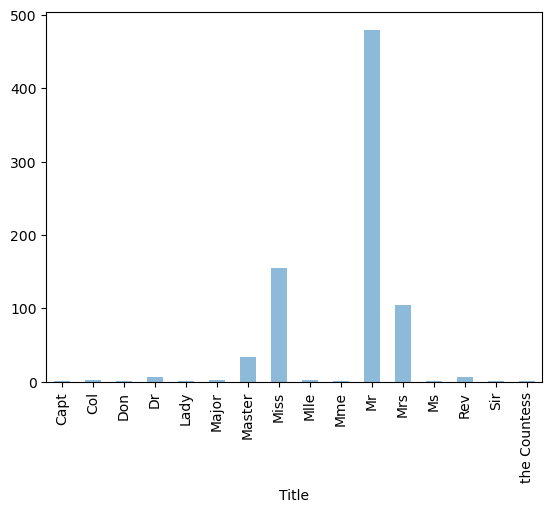

In [130]:
data_total1_df5.groupby("Title")["Title"].agg("count").plot(kind='bar', alpha=0.5, rot = 90)

In [131]:
title_dummies = pd.get_dummies(data_total1_df5["Title"], drop_first=True)
embarked_dummies = pd.get_dummies(data_total1_df5["Embarked"], drop_first=True)

In [132]:
data_total1_df5["Survived"] = data_total1_df5["Survived"].astype(bool) 

In [133]:
data_total1_df5[data_total1_df5["Age"].round() !=  data_total1_df5["Age"]].groupby("Age").agg("count")

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Number,Title
Age,,,,,,,,,
0.420000,1,1,1,1,1,1,1,1,1
0.670000,1,1,1,1,1,1,1,1,1
0.750000,2,2,2,2,2,2,2,2,2
0.830000,2,2,2,2,2,2,2,2,2
14.500000,1,1,1,1,1,1,1,1,1
20.500000,1,1,1,1,1,1,1,1,1
23.500000,1,1,1,1,1,1,1,1,1
24.500000,1,1,1,1,1,1,1,1,1
28.500000,2,2,2,2,2,2,2,2,2


Number of passengers with ticket number > 1000000: 31


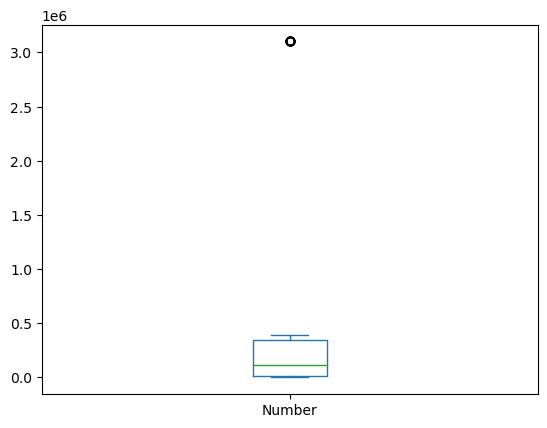

In [134]:
data_total1_df5["Number"].plot(kind='box', rot = 0)
print("Number of passengers with ticket number > 1000000:", data_total1_df5[data_total1_df5["Number"] > 850000]["Number"].agg("count"))
# Plenty of outliers, but we will keep it for now

<Axes: ylabel='Frequency'>

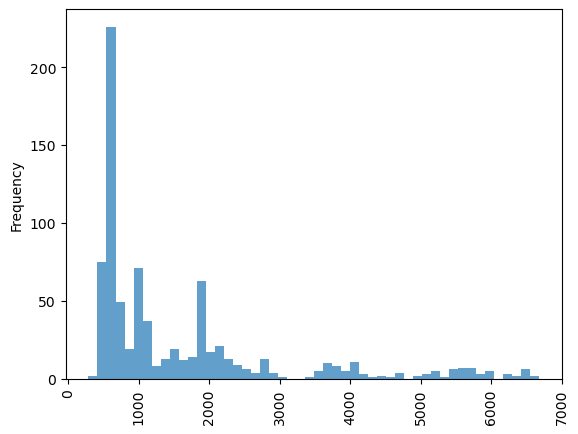

In [135]:
inflation_adjusted = pd.Series()
inflation_adjusted = data_total1_df5["Fare"] * 71.456
inflation_adjusted.plot(kind='hist', bins=50, alpha=0.7, rot = 90)

[]

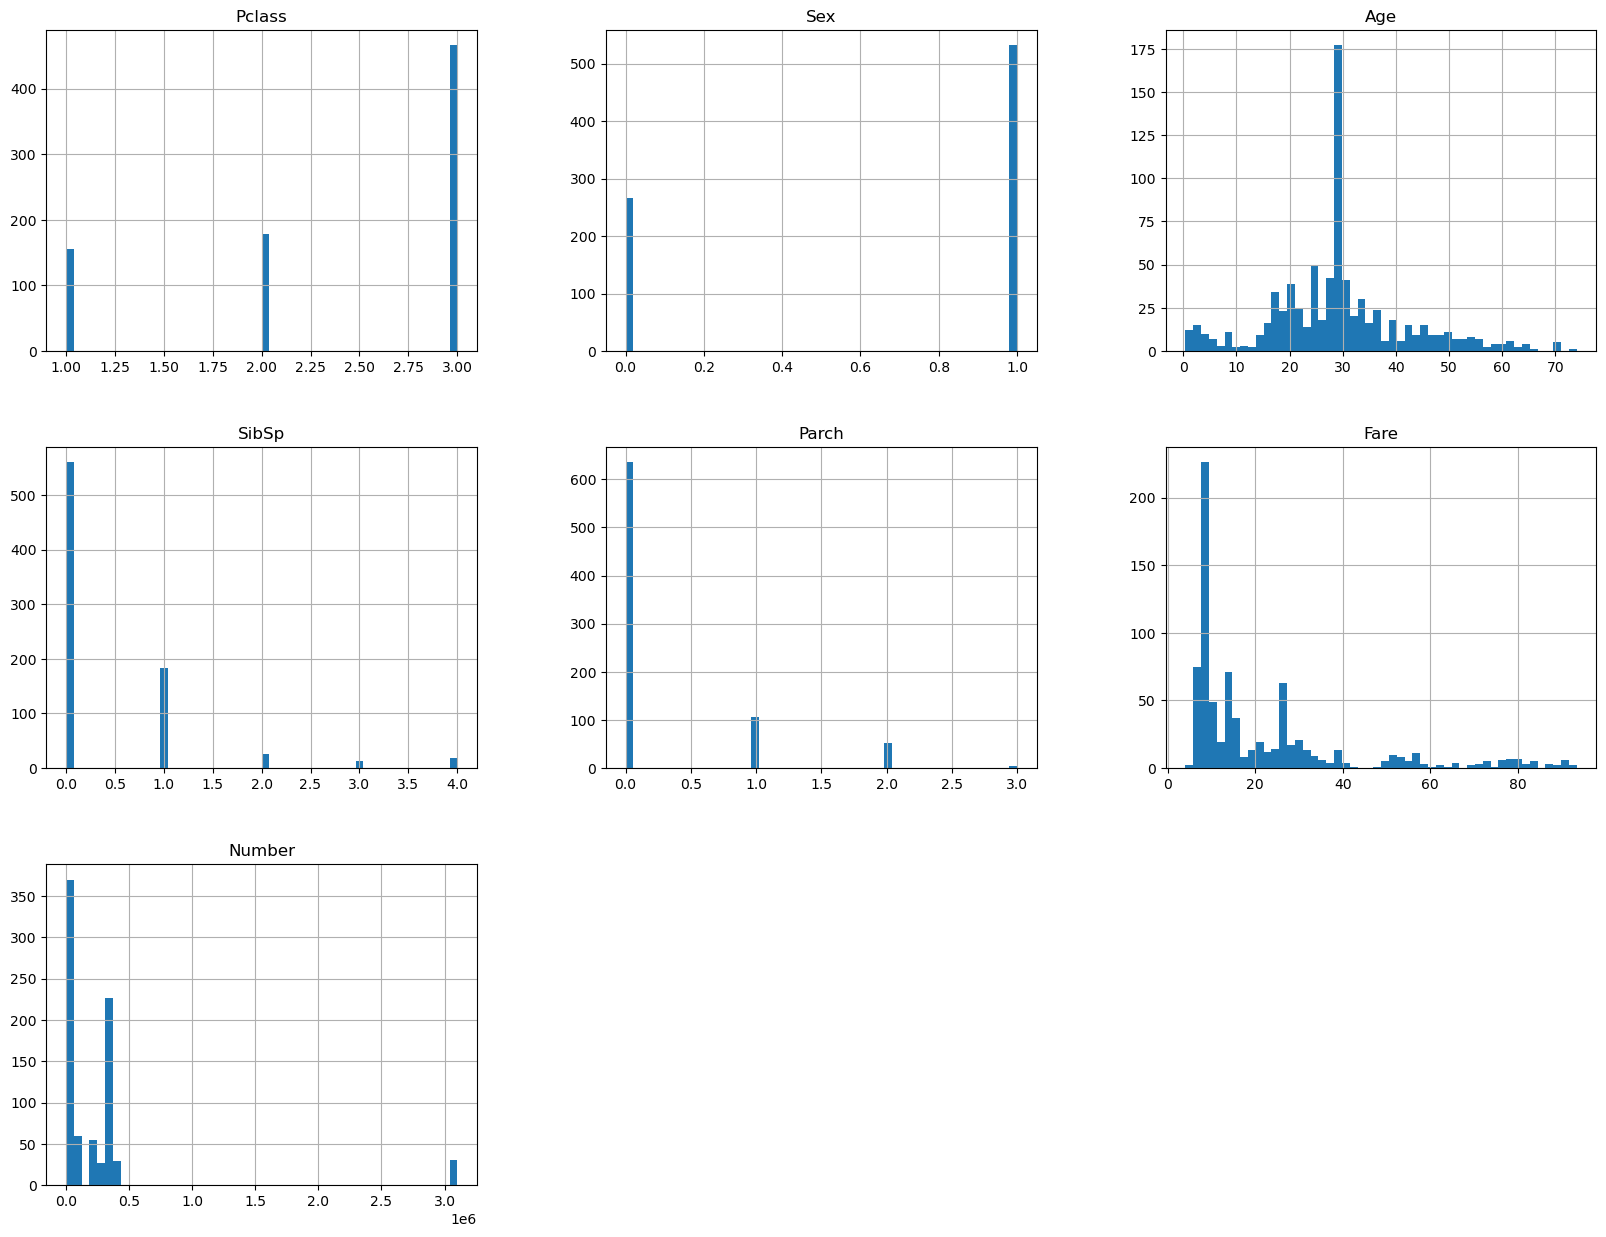

In [141]:
data_total1_df5.hist(bins=50, figsize=(20,15))
plt.plot()

In [143]:
data_total1_df6 = pd.concat([data_total1_df5, title_dummies, embarked_dummies], axis=1)
data_total1_df6.drop(["Title", "Embarked"], axis=1, inplace=True)
data_total1_df6

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Number,Col,Don,...,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,Q,S
0,False,3,1,22.000000,1,0,7.2500,21171,False,False,...,False,False,True,False,False,False,False,False,False,True
1,True,1,0,38.000000,1,0,71.2833,17599,False,False,...,False,False,False,True,False,False,False,False,False,False
2,True,3,0,26.000000,0,0,7.9250,3101282,False,False,...,False,False,False,False,False,False,False,False,False,True
3,True,1,0,35.000000,1,0,53.1000,113803,False,False,...,False,False,False,True,False,False,False,False,False,True
4,False,3,1,35.000000,0,0,8.0500,373450,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,2,1,27.000000,0,0,13.0000,211536,False,False,...,False,False,False,False,False,True,False,False,False,True
887,True,1,0,19.000000,0,0,30.0000,112053,False,False,...,False,False,False,False,False,False,False,False,False,True
888,False,3,0,29.536411,1,2,23.4500,6607,False,False,...,False,False,False,False,False,False,False,False,False,True
889,True,1,1,26.000000,0,0,30.0000,111369,False,False,...,False,False,True,False,False,False,False,False,False,False


In [137]:
# Start building models

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [146]:
X = data_total1_df6.drop("Survived", axis=1)
y = data_total1_df6["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [152]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
# confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.64      0.98      0.78       144
        True       0.86      0.19      0.31        96

    accuracy                           0.66       240
   macro avg       0.75      0.58      0.54       240
weighted avg       0.73      0.66      0.59       240

[[141   3]
 [ 78  18]]


In [153]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.80      0.77      0.78       144
        True       0.67      0.71      0.69        96

    accuracy                           0.75       240
   macro avg       0.74      0.74      0.74       240
weighted avg       0.75      0.75      0.75       240

[[111  33]
 [ 28  68]]


In [154]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.84      0.90      0.87       144
        True       0.83      0.75      0.79        96

    accuracy                           0.84       240
   macro avg       0.84      0.82      0.83       240
weighted avg       0.84      0.84      0.84       240

[[129  15]
 [ 24  72]]


In [156]:
from sklearn.svm import SVC
svc = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.60      1.00      0.75       144
        True       1.00      0.01      0.02        96

    accuracy                           0.60       240
   macro avg       0.80      0.51      0.39       240
weighted avg       0.76      0.60      0.46       240

[[144   0]
 [ 95   1]]


In [158]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [160]:
import sklearn
sklearn.__version__

'1.3.0'

In [163]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: e:\Anaconda\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


In [164]:
pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 640.0 kB/s eta 0:00:17
    --------------------------------------- 0.1/10.6 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.3/10.6 MB 2.1 MB/s eta 0:00:05
   - -------------------------------------- 0.5/10.6 MB 2.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.6 MB 2.7 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/10.6 MB 2.8 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/10.6 MB 2.7 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.6 MB 2.8 MB/s eta 0:00:04
   ---- ----------------------------------- 1.1/10.6 MB 2.8 MB/s eta 0:00:04
   ---- ---